# Bootstrap Confidence Intervals

In [1]:
import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

**`Bootstrap`** is a non-parametric statistical technique to resample from a known sample to estimate uncertainty in summary statistics. 

Bootstrapping is distribution-free. It does not depend on a type of distribution.

Advantages:
- Bootstrap can obtain confidence intervals in any statistics.
- Bootstrap does not assume anything about the distribution.
- Bootstrap helps when there are too few samples.

`Bootstrap Confidence Intervals`: it consists of using the bootstrap resampling method as a nonparametric technique for calculating confidence intervals.

Traditional methods for calculating confidence intervals use equations that estimate the sampling distribution for a specific sample statistic when the data follow a particular distribution, normal, for instance. There are not formulas available for all combinations of sample statistics and data distributions!

The bootstrap method has no assumptions over data. It can analyze a broad range of sample statistics and properties, like the mean, median, mode, variance, standard deviation, skewness, kurtosis, proportions, among many others.

In this notebook, you will calculate other confidence intervals using bootstrapping.

## The Data

Let's generate 1000 age values of ficticious voters:

In [2]:
np.random.seed(123)
a = np.random.uniform(18, 85, size=1000)

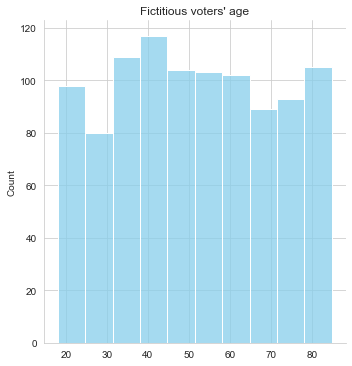

In [3]:
ax = sns.displot(x=a, bins=10, color='skyblue')
ax.set(title="Fictitious voters' age");

## Generating Samples

Let's define the function `generateSamples` to generate a DataFrame of samples from `a`.

`np.random.choice()`: generates a random sample WITH replacement from a given 1-D array

In [4]:
def generateSamples(sample_data, num_samples=10000, sample_size=100):
    '''    
    It returns a DataFrame where each column is a sample.
    '''
    df = pd.DataFrame()
    for k in range(num_samples):
        sampl = np.random.choice(sample_data, replace=True, size=sample_size)
        column_name = 'Sample'+str(k)
        df[column_name] = sampl
    return(df)

In [5]:
dfSamples = generateSamples(a)
print(dfSamples.shape)
dfSamples.head()

(100, 10000)


,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample9990,Sample9991,Sample9992,Sample9993,Sample9994,Sample9995,Sample9996,Sample9997,Sample9998,Sample9999
0,23.302980,19.691238,56.442866,43.237359,29.092518,43.601316,72.291095,59.457039,55.008795,28.855061,...,66.025825,68.358203,72.669728,80.500450,75.071867,55.145613,25.605108,23.856319,48.097234,38.533473
1,67.889236,56.123250,36.791958,51.410065,74.715917,25.663784,52.873080,25.663784,65.528841,84.210401,...,29.780494,84.265312,72.131860,25.064873,23.688579,20.505271,69.232055,28.791624,39.915693,47.705636
2,40.685008,18.518413,18.881709,76.012919,43.674000,62.283770,65.232242,81.453522,38.921502,77.857074,...,68.616784,52.859458,58.396457,64.226821,23.466080,35.639829,80.449946,40.690947,39.638247,53.073666
3,52.680772,23.574064,80.500450,42.410893,39.335130,30.797466,63.432386,29.660150,26.157542,34.243956,...,57.841120,76.314824,84.219143,27.090111,38.586062,53.305023,57.257749,68.464692,58.007398,74.650711
4,24.714369,46.565538,61.946848,40.767327,44.758374,41.011553,46.797494,39.115839,37.473931,31.791131,...,68.298039,20.505271,40.986768,27.784394,45.111639,76.012919,58.007398,31.155212,75.985810,44.271874


## Confidence Intervals with Bootstrapping

Let's define a function using the bootstrap method to calculate a confidence interval:

In [6]:
def confidenceInterval(sample_distribution, confidence):
    '''
    This function return a confidence% confidente interval using 
    sample_distribution as a sample distribution.
    '''
    alpha = 100 - confidence
    lower_percentile = alpha / 2.0    
    lower = np.percentile(sample_distribution, lower_percentile)
    upper_percentile = lower_percentile + confidence
    upper = np.percentile(sample_distribution, upper_percentile)
    return(lower, upper)

We can calculate confidence intervals for any statistic using bootstrapping. The first step is the get the sample distribution. This method has no assumptions over the data. Let's see!

### Bootstrap Confident Intervals for `mean` and `median`

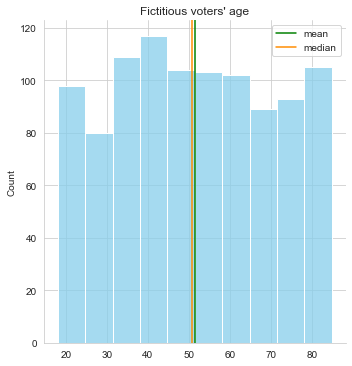

In [7]:
ax = sns.displot(x=a, bins=10, color='skyblue')
plt.axvline(x=a.mean(), color='green', label='mean')
plt.axvline(x=np.median(a), color='darkorange', label='median')
ax.set(title="Fictitious voters' age")
plt.legend();

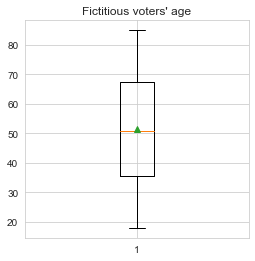

In [8]:
plt.figure(figsize=(4,4))
plt.boxplot(a, showmeans=True)
plt.title("Fictitious voters' age");

Remember the green triangle represents the mean value.

Let's calculate the mean and median scores for each generated sample, that is for each column in the DataFrame `dfSamples`

In [9]:
mean_scores   = np.array(dfSamples.mean())
median_scores = np.array(dfSamples.median())

In [10]:
scores = pd.DataFrame()
scores['mean'] = mean_scores
scores['median'] = median_scores

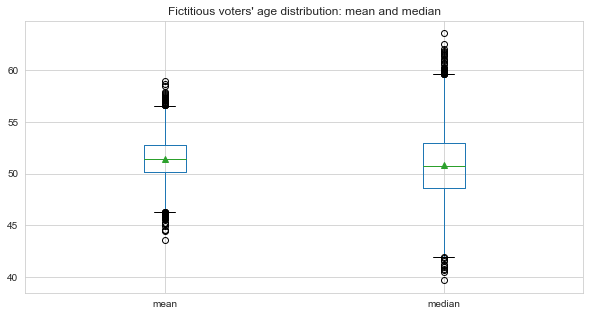

In [11]:
plt.figure(figsize=(10,5))
scores.boxplot(showmeans=True)
plt.title("Fictitious voters' age distribution: mean and median");

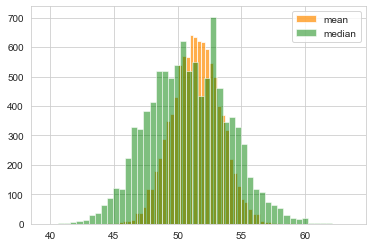

In [12]:
plt.hist(mean_scores, bins=50, color='darkorange', alpha=0.7, label='mean')
plt.hist(median_scores, bins=50, color='green', alpha=0.5, label='median')
plt.legend();

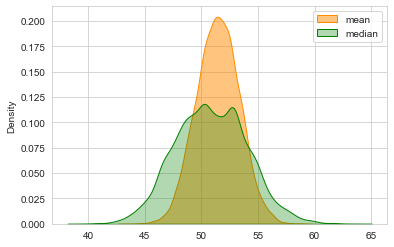

In [13]:
ax=sns.kdeplot(x=mean_scores, color='darkorange', shade=True, alpha=0.5, label='mean')
ax=sns.kdeplot(x=median_scores, color='green', shade=True, alpha=0.3, label='median')
plt.legend();

#### Bootstrap Confidence Interval for the `mean`

In [14]:
print('90% CI =', np.round(confidenceInterval(mean_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(mean_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(mean_scores, 99), 2))

90% CI = [48.33 54.49]
95% CI = [47.76 55.12]
99% CI = [46.64 56.27]


#### Bootstrap Confidence Interval for the `median`

In [15]:
print('90% CI =', np.round(confidenceInterval(median_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(median_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(median_scores, 99), 2))

90% CI = [45.9  55.94]
95% CI = [44.91 57.1 ]
99% CI = [43.26 59.28]


### Bootstrap Confident Intervals for the variance `var`, standard deviation `std`, and inter-quartile range `IQR`

In [16]:
var_scores  = np.array(dfSamples.var())
std_scores  = np.array(dfSamples.std())
IQR_scores  = np.array(dfSamples.quantile(0.75) - dfSamples.quantile(0.25))

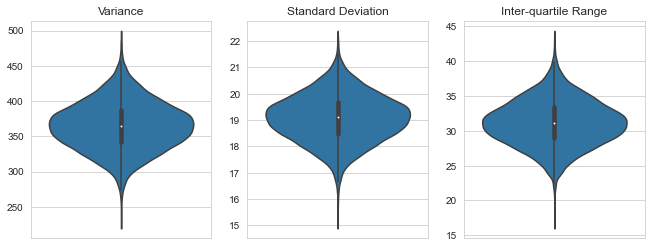

In [17]:
plt.figure(figsize=(11,4))

plt.subplot(131)
ax = sns.violinplot(y=var_scores)
ax.set(title = 'Variance');

plt.subplot(132)
ax = sns.violinplot(y=std_scores)
ax.set(title = 'Standard Deviation')

plt.subplot(133)
ax = sns.violinplot(y=IQR_scores)
ax.set(title = 'Inter-quartile Range');

#### Bootstrap Confidence Interval for `var`

In [18]:
print('90% CI =', np.round(confidenceInterval(var_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(var_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(var_scores, 99), 2))

90% CI = [309.8  422.22]
95% CI = [299.81 432.6 ]
99% CI = [279.91 452.57]


#### Bootstrap Confidence Interval for `std`

In [19]:
print('90% CI =', np.round(confidenceInterval(std_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(std_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(std_scores, 99), 2))

90% CI = [17.6  20.55]
95% CI = [17.32 20.8 ]
99% CI = [16.73 21.27]


#### Bootstrap Confidence Interval for `IQR`

In [20]:
print('90% CI =', np.round(confidenceInterval(IQR_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(IQR_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(IQR_scores, 99), 2))

90% CI = [25.85 36.52]
95% CI = [24.91 37.7 ]
99% CI = [23.39 39.85]


### Bootstrap Confident Intervals for the skewness `skew`, and kurtosis `kurt`

In [21]:
skew_scores  = np.array(dfSamples.skew())
kurt_scores  = np.array(dfSamples.kurt())

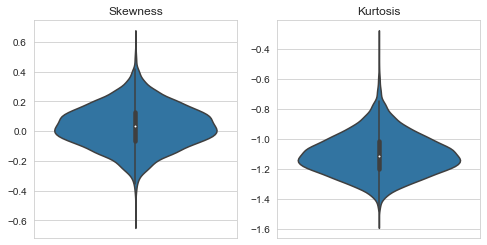

In [22]:
plt.figure(figsize=(8,4))

plt.subplot(121)
ax = sns.violinplot(y=skew_scores)
ax.set(title = 'Skewness')

plt.subplot(122)
ax = sns.violinplot(y=kurt_scores)
ax.set(title = 'Kurtosis');

#### Bootstrap Confidence Interval for `skew`

In [23]:
print('90% CI =', np.round(confidenceInterval(skew_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(skew_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(skew_scores, 99), 2))

90% CI = [-0.2   0.27]
95% CI = [-0.25  0.32]
99% CI = [-0.32  0.41]


#### Bootstrap Confidence Interval for `kurt`

In [24]:
print('90% CI =', np.round(confidenceInterval(kurt_scores, 90), 2))
print('95% CI =', np.round(confidenceInterval(kurt_scores, 95), 2))
print('99% CI =', np.round(confidenceInterval(kurt_scores, 99), 2))

90% CI = [-1.31 -0.86]
95% CI = [-1.34 -0.8 ]
99% CI = [-1.4  -0.68]


## Graphical Confidence Intervals with Bootstrapping

Given the sample distribution, we can represent the confidence interval graphically. Let's see an example with the mean.

In [25]:
def graphConfidenceInterval(sample_distribution, confidence=95):
    '''
    It returns a confidence% confident interval using sample_distribution as a 
    sample distribution and presents the result graphically.
    '''
    alpha = 100 - confidence
    lower_percentile = alpha / 2.0    
    lower = np.percentile(sample_distribution, lower_percentile)
    upper_percentile = lower_percentile + confidence
    upper = np.percentile(sample_distribution, upper_percentile)
    sns.displot(sample_distribution, kde=True, height=3, aspect=1.5)
    plt.title('Sample Distribution\n %i%% CI: (%.2f, %.2f)'%(confidence, lower,upper))
    plt.axvline(x = lower, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    plt.axvline(x = upper, ymin=0, ymax=0.5, color='orangered', linewidth=2);

#### Graphical Bootstrap Confidence Interval for the `mean`

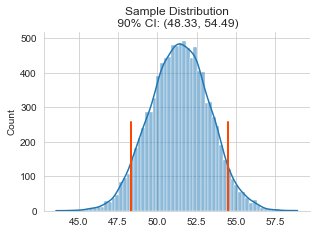

In [26]:
graphConfidenceInterval(mean_scores, 90)

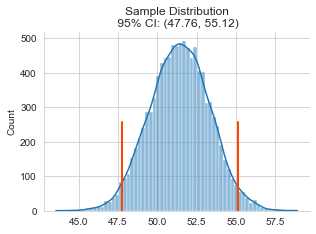

In [27]:
graphConfidenceInterval(mean_scores, 95)

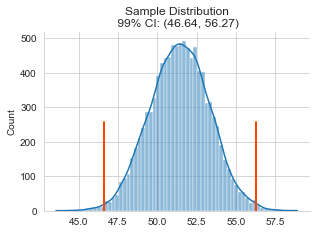

In [28]:
graphConfidenceInterval(mean_scores, 99)

## Analyzing Student Performance dataset

In [29]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Let's calculate the confidence interval for the mean of the variables:
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

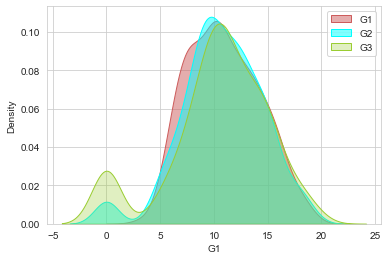

In [30]:
plt.figure(figsize=(6,4))
ax = sns.kdeplot(x=data.G1, color='indianred', shade=True, alpha=0.5, label='G1')
ax = sns.kdeplot(x=data.G2, color='cyan', shade=True, alpha=0.5, label='G2')
ax = sns.kdeplot(x=data.G3, color='yellowgreen', shade=True, alpha=0.3, label='G3')
plt.legend();

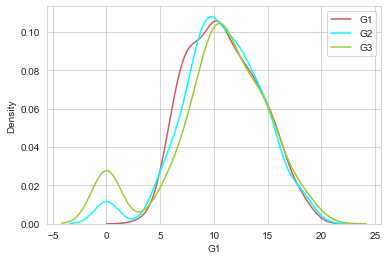

In [31]:
plt.figure(figsize=(6,4))
ax = sns.kdeplot(x=data.G1, color='indianred', alpha=0.7, label='G1')
ax = sns.kdeplot(x=data.G2, color='cyan', alpha=0.7, label='G2')
ax = sns.kdeplot(x=data.G3, color='yellowgreen', alpha=0.3, label='G3')
plt.legend();

#### G1

We are going to start generating the samples for creating the sample distribution.

In [32]:
# G1
df_G1 = generateSamples(data.G1)
print(df_G1.shape)
df_G1.head()

(100, 10000)


,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample9990,Sample9991,Sample9992,Sample9993,Sample9994,Sample9995,Sample9996,Sample9997,Sample9998,Sample9999
0,12,8,11,13,13,9,18,5,16,15,...,15,18,15,14,8,14,11,6,6,11
1,6,13,13,12,6,10,14,8,10,14,...,5,12,10,14,10,9,7,7,6,10
2,9,10,8,12,15,12,6,16,11,14,...,8,9,14,11,11,6,14,6,14,11
3,7,8,12,14,8,8,10,8,13,7,...,9,6,10,17,9,16,8,10,9,7
4,13,15,8,6,15,11,10,7,15,12,...,12,11,6,12,13,11,7,14,13,7


In [33]:
G1_scores = np.array(df_G1.mean())

Now we can calculate the confidence intervals.

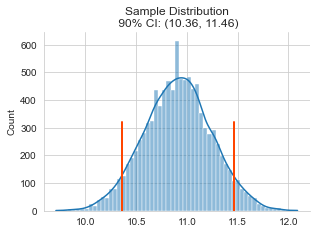

In [34]:
graphConfidenceInterval(G1_scores, 90)

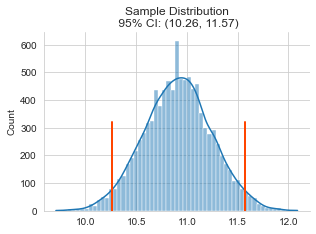

In [35]:
graphConfidenceInterval(G1_scores, 95)

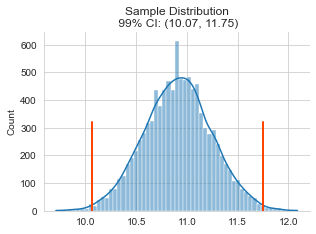

In [36]:
graphConfidenceInterval(G1_scores, 99)

#### G2

In [37]:
# G2
df_G2 = generateSamples(data.G2)
G2_scores = np.array(df_G2.mean())

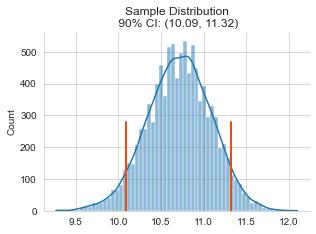

In [38]:
graphConfidenceInterval(G2_scores, 90)

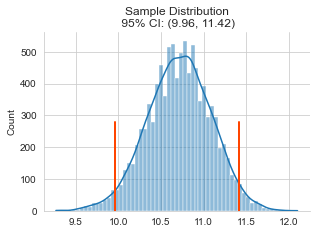

In [39]:
graphConfidenceInterval(G2_scores, 95)

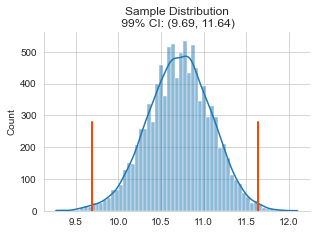

In [40]:
graphConfidenceInterval(G2_scores, 99)

#### G3

In [41]:
# G3
df_G3 = generateSamples(data.G3)
G3_scores = np.array(df_G3.mean())

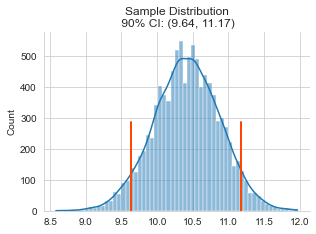

In [42]:
graphConfidenceInterval(G3_scores, 90)

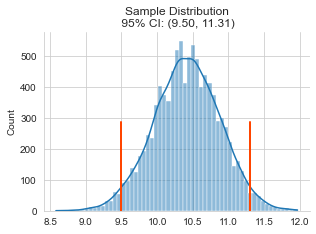

In [43]:
graphConfidenceInterval(G3_scores, 95)

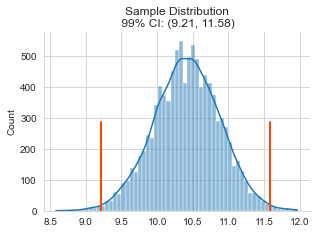

In [44]:
graphConfidenceInterval(G3_scores, 99)